In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Existen dos pandas.read debido a que se utilizo GColab debido a la falta de recursos con la pc local

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [5]:
# descomentar en GColab
#acc_vel_loc_sinrangos = pd.read_parquet('/content/drive/MyDrive/soyHenry/PiDa/PiDa/data/interim/Acc_vel_loc_sinrangos.parquet')
# descomentar en local
acc_vel_loc_sinrangos = pd.read_parquet('../data/interim/Acc_vel_loc_sinrangos.parquet')
acc_vel_loc_sinrangos

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
index,,,,,,,,,,,,,,,,,,,,,
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3061,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3062,TUCUMAN,Trancas,Villa de Trancas,90112030,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


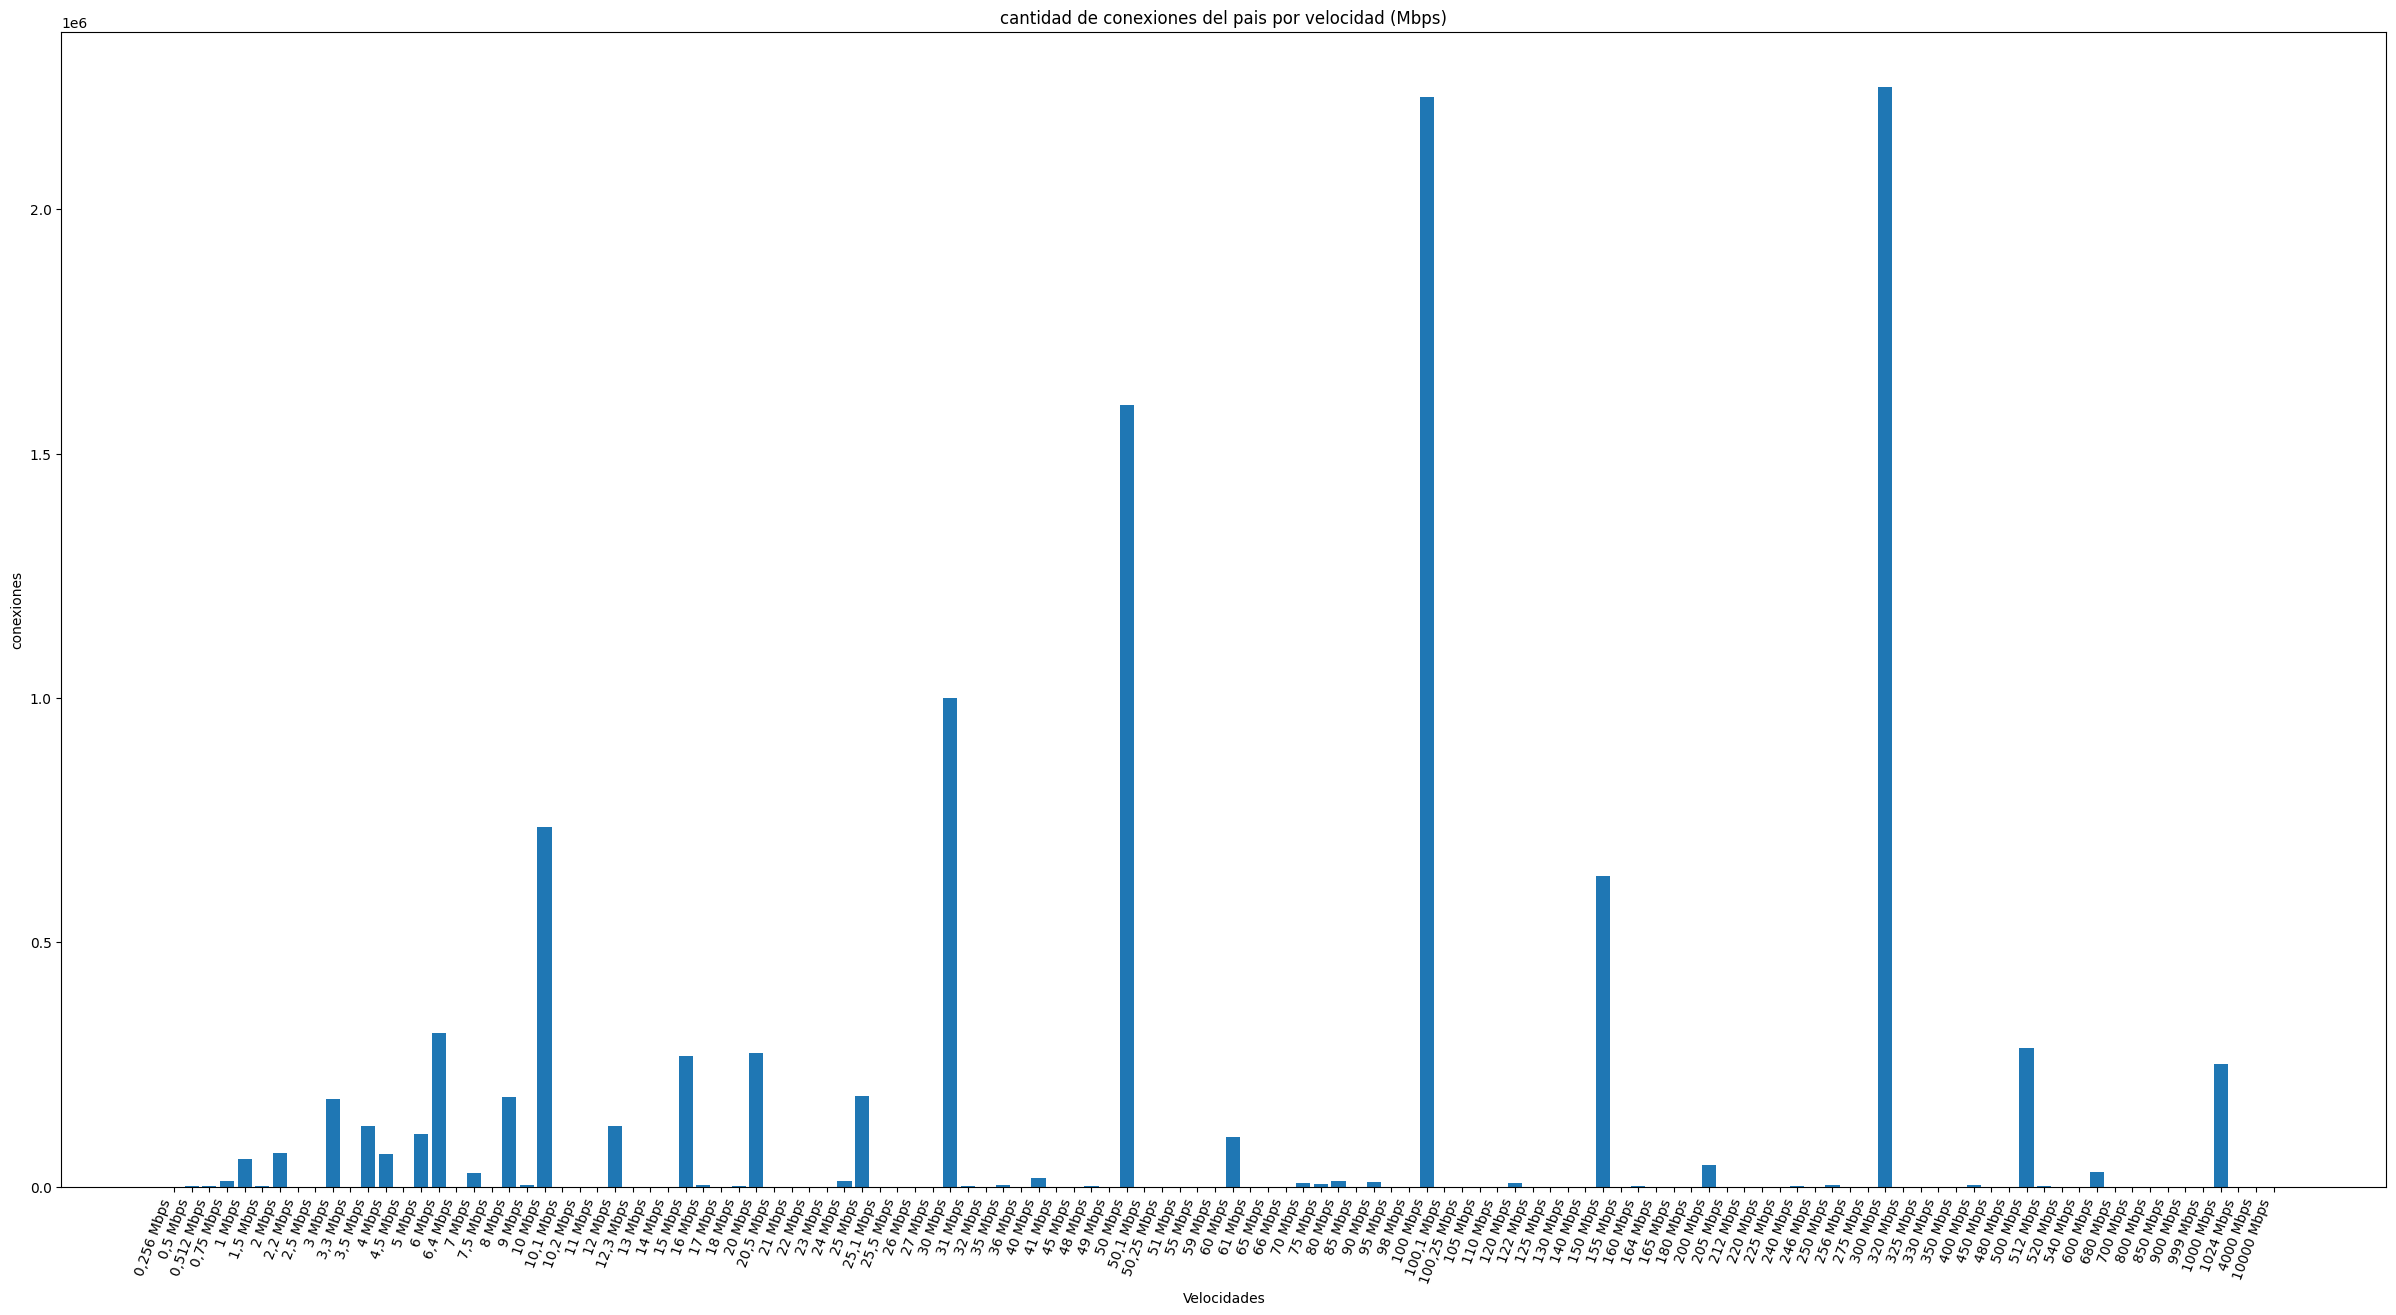

In [ ]:
plt.figure(figsize=(30,15))
plt.bar(acc_vel_loc_sinrangos.columns[5:], [acc_vel_loc_sinrangos[col].sum() for col in acc_vel_loc_sinrangos.columns[5:]])
plt.xlabel('Velocidades')
plt.xticks(rotation=70, ha='right')
plt.ylabel('conexiones')
plt.title('cantidad de conexiones del pais por velocidad (Mbps)')
plt.show()

**Si bien no se alcanza a observar bien las velocidades, se pueden apreciar pilares donde se concentra la mayoria de datos, por lo que voy a seccionar**(*sumando las columnas mas cercanas por determinados rangos*) **en los 5 pilares mas grandes**
- **0.256mbps - 10mbps**
- **10mbps - 30mbps**
- **30mbps - 50mbps**
- **50mbps - 100mbps**
- **100mbps - 300mbps**
- **+ de 300mbps**

Voy a estar imprimiendo los rangos para despues copiarlos en la funcion pandas.Dataframe y generar columnas de cada una de estos rangos

*Con ILOC voy a revisar las columnas para despues con la funcion sum() de pandas hacer una suma por separado, de todos los valores que hay en cada columna*

In [ ]:
#iloc[inicio_row:fin_row , inicio_col:fin_col] dejo la fila en 0 ya que solo me interesa saber que columnas voy a seleccionar
print(acc_vel_loc_sinrangos.iloc[:0,6:27])
print(acc_vel_loc_sinrangos.iloc[:0,27:50])
print(acc_vel_loc_sinrangos.iloc[:0,50:60])
print(acc_vel_loc_sinrangos.iloc[:0,60:77])
print(acc_vel_loc_sinrangos.iloc[:0,77:103])
print(acc_vel_loc_sinrangos.iloc[:0,103:])

Empty DataFrame
Columns: [0,5 Mbps, 0,512 Mbps, 0,75 Mbps, 1 Mbps, 1,5 Mbps, 2 Mbps, 2,2 Mbps, 2,5 Mbps, 3 Mbps, 3,3 Mbps, 3,5 Mbps, 4 Mbps, 4,5 Mbps, 5 Mbps, 6 Mbps, 6,4 Mbps, 7 Mbps, 7,5 Mbps, 8 Mbps, 9 Mbps, 10 Mbps]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [10,1 Mbps, 10,2 Mbps, 11 Mbps, 12 Mbps, 12,3 Mbps, 13 Mbps, 14 Mbps, 15 Mbps, 16 Mbps, 17 Mbps, 18 Mbps, 20 Mbps, 20,5 Mbps, 21 Mbps, 22 Mbps, 23 Mbps, 24 Mbps, 25 Mbps, 25,1 Mbps, 25,5 Mbps, 26 Mbps, 27 Mbps, 30 Mbps]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [31 Mbps, 32 Mbps, 35 Mbps, 36 Mbps, 40 Mbps, 41 Mbps, 45 Mbps, 48 Mbps, 49 Mbps, 50 Mbps]
Index: []
Empty DataFrame
Columns: [50,1 Mbps, 50,25 Mbps, 51 Mbps, 55 Mbps, 59 Mbps, 60 Mbps, 61 Mbps, 65 Mbps, 66 Mbps, 70 Mbps, 75 Mbps, 80 Mbps, 85 Mbps, 90 Mbps, 95 Mbps, 98 Mbps, 100 Mbps]
Index: []
Empty DataFrame
Columns: [100,1 Mbps, 100,25 Mbps, 105 Mbps, 110 Mbps, 120 Mbps, 122 Mbps, 125 Mbps, 130 Mbps, 140 Mbps, 150 Mbps, 155 Mbps, 160 Mbp

**Despues de varias pruebas pude identificar los rangos de cada columna para sumarlas!**

*pisamos el DF reescribiendo las columnas de las velocidades*

In [ ]:
acc_vel_loc_sinrangos = pd.DataFrame(
    {   'Provincia' : acc_vel_loc_sinrangos['Provincia'],
        'Partido' : acc_vel_loc_sinrangos['Partido'],
        'Localidad' : acc_vel_loc_sinrangos['Localidad'],
        'Otros(Mbps)' : acc_vel_loc_sinrangos['Otros'],
        '<10 Mbps' : acc_vel_loc_sinrangos.iloc[:,6:27].sum(axis=1),
        '10-30 Mbps' : acc_vel_loc_sinrangos.iloc[:,27:50].sum(axis=1),
        '30-50 Mbps' : acc_vel_loc_sinrangos.iloc[:,50:60].sum(axis=1),
        '50-100 Mbps' : acc_vel_loc_sinrangos.iloc[:,60:77].sum(axis=1),
        '100-300 Mbps' : acc_vel_loc_sinrangos.iloc[:,77:103].sum(axis=1),
        '+ de 300 Mbps' : acc_vel_loc_sinrangos.iloc[:,103:].sum(axis=1)
    }
)


**y *voilá* con esto nos queda un DF mas facil de mirarse**

In [ ]:
acc_vel_loc_sinrangos

,Provincia,Partido,Localidad,Otros(Mbps),<10 Mbps,10-30 Mbps,30-50 Mbps,50-100 Mbps,100-300 Mbps,+ de 300 Mbps
index,,,,,,,,,,
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0.0,914.0,3857.0,674.0,702.0,95.0,3.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0.0,59.0,5.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,0.0,192.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,0.0,75.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0.0,180.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0.0,0.0,0.0,526.0,4370.0,2398.0,128.0
3061,TUCUMAN,Trancas,San Pedro de Colalao,0.0,0.0,400.0,24.0,0.0,0.0,0.0
3062,TUCUMAN,Trancas,Villa de Trancas,0.0,131.0,68.0,0.0,0.0,0.0,0.0


Ahora que ya tengo un DF mas reducido y mas claro,puedo intentar chequear con barras cual es la velocidad de descarga mas recurrente en el pais

In [ ]:
acc_vel_loc_sinrangos.iloc[:,3:]

,Otros(Mbps),<10 Mbps,10-30 Mbps,30-50 Mbps,50-100 Mbps,100-300 Mbps,+ de 300 Mbps
index,,,,,,,
0,0.0,914.0,3857.0,674.0,702.0,95.0,3.0
1,0.0,59.0,5.0,0.0,0.0,0.0,0.0
2,0.0,192.0,0.0,0.0,0.0,0.0,0.0
3,0.0,75.0,0.0,0.0,0.0,0.0,0.0
4,0.0,180.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
3060,0.0,0.0,0.0,526.0,4370.0,2398.0,128.0
3061,0.0,0.0,400.0,24.0,0.0,0.0,0.0
3062,0.0,131.0,68.0,0.0,0.0,0.0,0.0


In [ ]:
otros = acc_vel_loc_sinrangos['Otros(Mbps)'].sum()
menores_a_10 = acc_vel_loc_sinrangos['<10 Mbps'].sum()
rango10_30 = acc_vel_loc_sinrangos['10-30 Mbps'].sum()
rango30_50 = acc_vel_loc_sinrangos['30-50 Mbps'].sum()
rango50_100 = acc_vel_loc_sinrangos['50-100 Mbps'].sum()
rango100_300 = acc_vel_loc_sinrangos['100-300 Mbps'].sum()
mayor_300 = acc_vel_loc_sinrangos['+ de 300 Mbps'].sum()


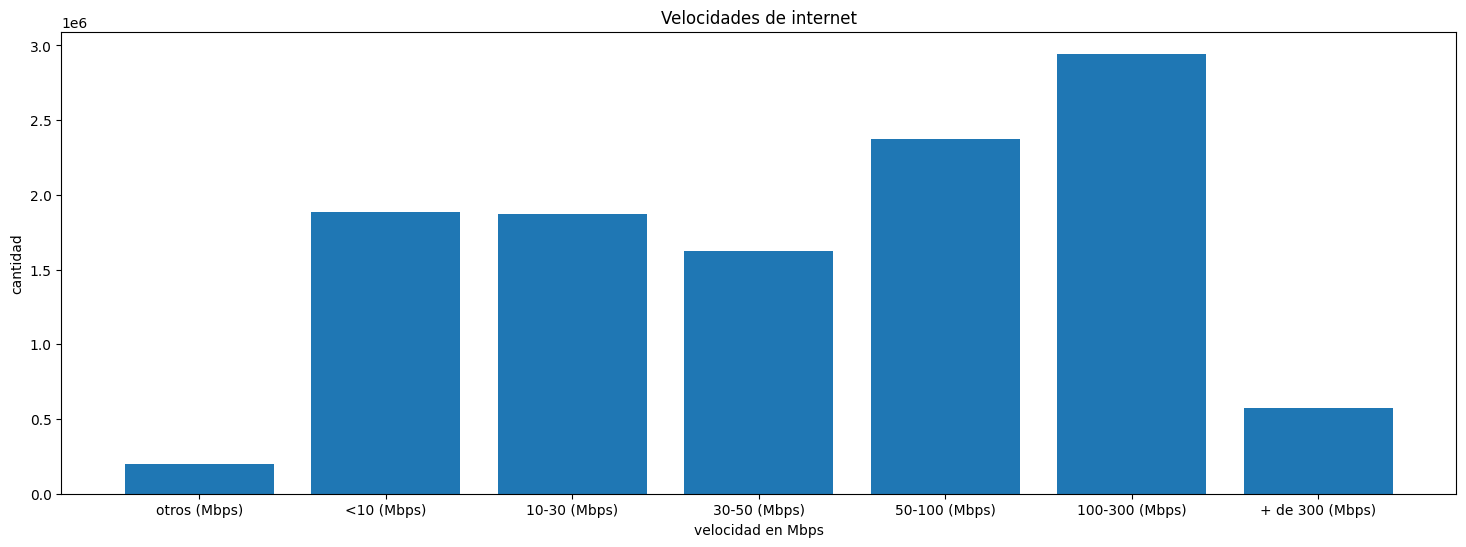

In [ ]:
plt.figure(figsize=(18,6))
plt.bar(['otros (Mbps)','<10 (Mbps)', '10-30 (Mbps)','30-50 (Mbps)','50-100 (Mbps)','100-300 (Mbps)','+ de 300 (Mbps)'], [otros,menores_a_10,rango10_30,rango30_50,rango50_100,rango100_300,mayor_300])
plt.xlabel('velocidad en Mbps')
plt.ylabel('cantidad')
plt.title('Velocidades de internet')
plt.show()

al tratar de obtener la localizacion siempre tenia fallas o datos mal cargados debido a dos casos:
- datos de latitud y longitud de otros paises hispanohablantes, para evitar esto concateno estados y provincias (+pais) para ser mas precisos en la busqueda

- Lo dejo todo en minuscula ya que me tiraba muchos errores cuando intentaba buscar los valores con la funcion geocode de Photon  

- voy a seccionar por partidos y no por localidades, evito menor tiempo de proceso en obtener la latitud y longitud

In [ ]:
acc_vel_loc_sinrangos['ubicacion'] = acc_vel_loc_sinrangos['Partido'].str.lower() + ", "+ acc_vel_loc_sinrangos['Provincia'].str.lower() + ", argentina"

In [ ]:
acc_vel_loc_sinrangos.head(20)

,Provincia,Partido,Localidad,Otros(Mbps),<10 Mbps,10-30 Mbps,30-50 Mbps,50-100 Mbps,100-300 Mbps,+ de 300 Mbps,ubicacion
index,,,,,,,,,,,
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0.0,914.0,3857.0,674.0,702.0,95.0,3.0,"25 de mayo, buenos aires, argentina"
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0.0,59.0,5.0,0.0,0.0,0.0,0.0,"25 de mayo, buenos aires, argentina"
2,BUENOS AIRES,25 de Mayo,Del Valle,0.0,192.0,0.0,0.0,0.0,0.0,0.0,"25 de mayo, buenos aires, argentina"
3,BUENOS AIRES,25 de Mayo,Ernestina,0.0,75.0,0.0,0.0,0.0,0.0,0.0,"25 de mayo, buenos aires, argentina"
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0.0,180.0,0.0,0.0,1.0,0.0,0.0,"25 de mayo, buenos aires, argentina"
5,BUENOS AIRES,25 de Mayo,Lucas Monteverde,0.0,5.0,0.0,0.0,0.0,0.0,0.0,"25 de mayo, buenos aires, argentina"
6,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,0.0,1139.0,351.0,20.0,0.0,0.0,0.0,"25 de mayo, buenos aires, argentina"
7,BUENOS AIRES,25 de Mayo,Pedernales,0.0,179.0,3.0,25.0,0.0,0.0,0.0,"25 de mayo, buenos aires, argentina"
8,BUENOS AIRES,25 de Mayo,San Enrique,0.0,0.0,11.0,0.0,0.0,0.0,0.0,"25 de mayo, buenos aires, argentina"


In [ ]:
from geopy.geocoders import Photon
geolocator = Photon(user_agent="my_app")

#convertimos a una lista las claves de la ubicacion para pasarlo despues por argumento a la funcion geocode de Photon
locations = list(acc_vel_loc_sinrangos.ubicacion.value_counts().keys())
#en este diccionario vamos a guardar: key(partido que queremos obtener):values(latitud, longitud)
geolocations = {}
#aca vamos a tener por las dudas la lista de errores en caso de necesitar saber cuales fallaron
errores = []

for location in locations:
    try:
        loc = geolocator.geocode(location)
        geolocations[location] = (loc.latitude, loc.longitude)
    except Exception as e:
        #guardamos aquellos partidos que no fueron encontrados con la funcion
        errores.append(location)


**Una vez que ya obtuve los datos de longitud y latitud voy a separar los datos en 3 columnas, convirtiendo las claves del diccionario en una lista, y haciendo lo mismo con el primer valor de la tupla value y lo mismo con el segundo valor de esta**

In [ ]:
df = pd.DataFrame({
    'ubicacion': list(geolocations.keys()), #por ejemplo "san justo, cordoba, argentina"
    'latitud': [x[0] for x in geolocations.values()], #(-31.215022, -62.582034) tupla[0] = -31.215022
    'longitud': [x[1] for x in geolocations.values()]  #(-31.215022, -62.582034) tupla[1] = -62.582034
})

In [ ]:
df.head()

,ubicacion,latitud,longitud
0,"san justo, cordoba, argentina",-31.215022,-62.582034
1,"castellanos, santa fe, argentina",-31.241076,-61.661897
2,"rosario, santa fe, argentina",-32.959361,-60.661702
3,"general lópez, santa fe, argentina",-33.897794,-61.853916
4,"la plata, buenos aires, argentina",-34.920680,-57.953764


In [ ]:
acc_vel_loc_sinrangos = pd.merge(acc_vel_loc_sinrangos, df, on='ubicacion')

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Crea un mapa con gráficos de dispersión
fig = go.Figure(go.Scattermapbox(
        lat=acc_vel_loc_sinrangos['latitud'],
        lon=acc_vel_loc_sinrangos['longitud'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color=acc_vel_loc_sinrangos['30-50 Mbps'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title='10-30 Mbps')
        ),
        hoverinfo='text'
    ))

# Agrega un título al mapa
fig.update_layout(
    title='Mapa de dispersión de velocidad de internet',
    mapbox_style="open-street-map",
    mapbox_zoom=3,
    mapbox_center_lat=-35.432415,
    mapbox_center_lon=-60.171624
)

# Muestra el mapa
fig.show()

In [ ]:
# descomentar en GColab
# acc_vel_loc_sinrangos.to_excel("/content/drive/MyDrive/soyHenry/PiDa/PiDa/data/processed/accesso_por_velocidad.xlsx")

# descomentar en local
acc_vel_loc_sinrangos.to_excel("../data/processed/accesso_por_velocidad.xlsx")

Vamos a seguir probando mas graficos a ver que otras variantes podemos obtener de los otros datos de las siguientes hojas

In [ ]:
accesos_tecnologia = pd.read_parquet("../data/interim/accesos_tecnologia")
accesos_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
index,,,,,,,,,
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [ ]:
accesos_tecnologia.Provincia.value_counts()

Provincia
Buenos Aires           41
Capital Federal        41
Catamarca              41
Chaco                  41
Chubut                 41
Córdoba                41
Corrientes             41
Entre Ríos             41
Formosa                41
Jujuy                  41
La Pampa               41
La Rioja               41
Mendoza                41
Misiones               41
Neuquén                41
Río Negro              41
Salta                  41
San Juan               41
San Luis               41
Santa Cruz             41
Santa Fe               41
Santiago Del Estero    41
Tierra Del Fuego       41
Tucumán                41
Name: count, dtype: int64

Creo que podria encontrar algo interesante si sumo los datos de los servicios por tecnologia durante cada trimestre del año

In [ ]:
acc_tec_suma_anual = accesos_tecnologia.drop(['Provincia'],axis=1)
acc_tec_suma_anual = acc_tec_suma_anual.groupby(['Año','Trimestre']).sum().reset_index()

In [ ]:
acc_tec_suma_anual

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,1,3697066.0,2407330.0,150323.0,70749.0,72930.0,6398398.0
1,2014,2,3708882.0,2461670.0,149363.0,72405.0,72148.0,6464468.0
2,2014,3,3714764.0,2569868.0,155494.0,85096.0,70049.0,6595271.0
3,2014,4,3764038.0,2536219.0,149682.0,76984.0,71573.0,6598496.0
4,2015,1,3756153.0,2668248.0,168188.0,79098.0,66045.0,6737732.0
5,2015,2,3767821.0,2756294.0,150839.0,82077.0,59157.0,6816188.0
6,2015,3,3788696.0,2840203.0,162663.0,84530.0,58976.0,6935068.0
7,2015,4,3803024.0,2898226.0,139187.0,85726.0,58668.0,6984831.0
8,2016,1,3792493.0,2806359.0,164371.0,85370.0,58763.0,6907356.0
9,2016,2,3782085.0,3035272.0,167788.0,85452.0,59482.0,7130079.0


*Solo por curiosidad voy a chequear como se veria si se traspone el DF*

In [ ]:
acc_tec_suma_anual.transpose()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Año,2014,2014,2014,2014,2015,2015,2015,2015,2016,2016,...,2021,2022,2022,2022,2022,2023,2023,2023,2023,2024
Trimestre,1,2,3,4,1,2,3,4,1,2,...,4,1,2,3,4,1,2,3,4,1
ADSL,3697066.0,3708882.0,3714764.0,3764038.0,3756153.0,3767821.0,3788696.0,3803024.0,3792493.0,3782085.0,...,1657615.0,1533240.0,1468333.0,1395277.0,1315373.0,1204417.0,1006509.0,897895.0,836390.0,774475.0
Cablemodem,2407330.0,2461670.0,2569868.0,2536219.0,2668248.0,2756294.0,2840203.0,2898226.0,2806359.0,3035272.0,...,5984240.0,6073426.0,5979214.0,6031970.0,6037457.0,6002582.0,5997149.0,6018832.0,6022532.0,5986957.0
Fibra óptica,150323.0,149363.0,155494.0,149682.0,168188.0,150839.0,162663.0,139187.0,164371.0,167788.0,...,2072236.0,2219533.0,2723285.0,2871541.0,3060575.0,3243411.0,3463988.0,3708718.0,3908183.0,4015101.0
Wireless,70749.0,72405.0,85096.0,76984.0,79098.0,82077.0,84530.0,85726.0,85370.0,85452.0,...,523107.0,545814.0,556243.0,557110.0,572969.0,576647.0,581823.0,581436.0,585760.0,598682.0
Otros,72930.0,72148.0,70049.0,71573.0,66045.0,59157.0,58976.0,58668.0,58763.0,59482.0,...,252596.0,251996.0,231609.0,235230.0,221740.0,214838.0,202428.0,200027.0,194796.0,257941.0
Total,6398398.0,6464468.0,6595271.0,6598496.0,6737732.0,6816188.0,6935068.0,6984831.0,6907356.0,7130079.0,...,10489794.0,10624009.0,10958684.0,11091128.0,11208114.0,11241895.0,11251897.0,11406908.0,11547661.0,11633156.0


# Esto me genera una idea...

**Voy a revisar el crecimiento con lineas, para esto voy a omitir la columna "TOTAL", asi no me distorsiona el grafico y puedo ver cada una de las lineas de las tecnologias que dan acceso a internet**

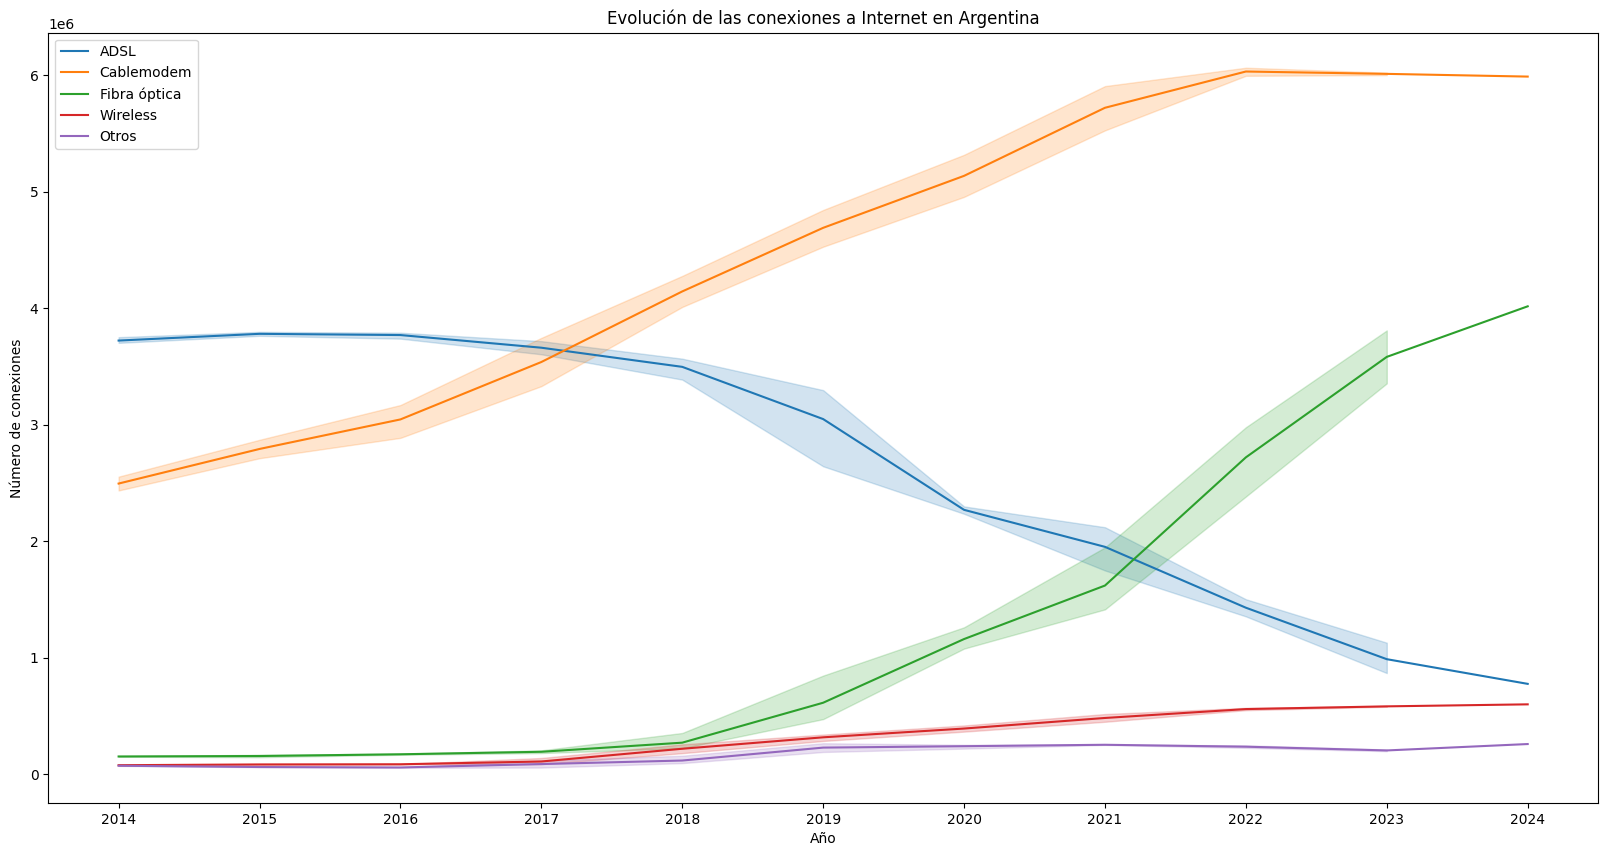

In [ ]:
#Encontre un codigo mas resumido pero era tan confuso que decidi hacerlo columna por columna, tecnologiaXtecnologia, para tener una nocion de lo que hacia cada linea

plt.figure(figsize=(20, 10))
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='ADSL', label='ADSL')
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='Cablemodem', label='Cablemodem')
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='Fibra óptica', label='Fibra óptica')
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='Wireless', label='Wireless')
sns.lineplot(data=acc_tec_suma_anual, x='Año', y='Otros', label='Otros')

plt.title('Evolución de las conexiones a Internet en Argentina')
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.legend()
plt.show()

se puede notar gracias a las lineas que tras pandemia:
- Hubo un crecimiento acelerado de Fibra optica  
- Mientras que cablemodem, se mantuvo en crecimiento hasta 2022 y luego comenzo a verse una muy leve caida
- Wireless ha continuado creciendo a un ritmo constante, sin aceleraciones
- mientras que otras tecnologias se mantienen bajo Wireless sin decrecer  

por otro lado ADSL viene dejando de utilizarse desde 2016

In [ ]:
accesos_tecnologia.to_excel("../data/processed/accesos_por_tecnologia.xlsx")

Ahora voy a revisar que los ingresos sean acordes en todos los trimestres anuales

In [ ]:
ingresos = pd.read_parquet("../data/interim/ingresos.parquet")
ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2023,1,1.041350e+08,Ene-Mar 2023
5,2022,4,7.244348e+07,Oct-Dic 2022
6,2022,3,6.408678e+07,Jul-Sept 2022
7,2022,2,6.041950e+07,Abr-Jun 2022
8,2022,1,5.521931e+07,Ene-Mar 2022
9,2021,4,4.546789e+07,Oct-Dic 2021


In [ ]:
trim_1 = ingresos[ingresos['Trimestre']==1]
trim_1 = trim_1.drop(['Periodo','Trimestre'],axis=1)
#por el momento vamos a omitir el trimestre del ultimo año(2024) ya que si no me va a dar una mala presentacion grafica (aparece el primer trimestre pintado sin el resto de trimestres)
trim_1 = trim_1.tail(10)
trim_1

,Año,Ingresos (miles de pesos)
4,2023,1.041350e+08
8,2022,5.521931e+07
12,2021,3.667637e+07
16,2020,2.994622e+07
20,2019,2.020741e+07
24,2018,1.317146e+07
28,2017,8.701201e+06
32,2016,5.936845e+06
36,2015,4.876385e+06
40,2014,2.984054e+06


In [ ]:
trim_2 = ingresos[ingresos['Trimestre']==2]
trim_2 = trim_2.drop(['Periodo','Trimestre'],axis=1)
#
trim_3 = ingresos[ingresos['Trimestre']==3]
trim_3 = trim_3.drop(['Periodo','Trimestre'],axis=1)
#
trim_4 = ingresos[ingresos['Trimestre']==4]
trim_4 = trim_4.drop(['Periodo','Trimestre'],axis=1)

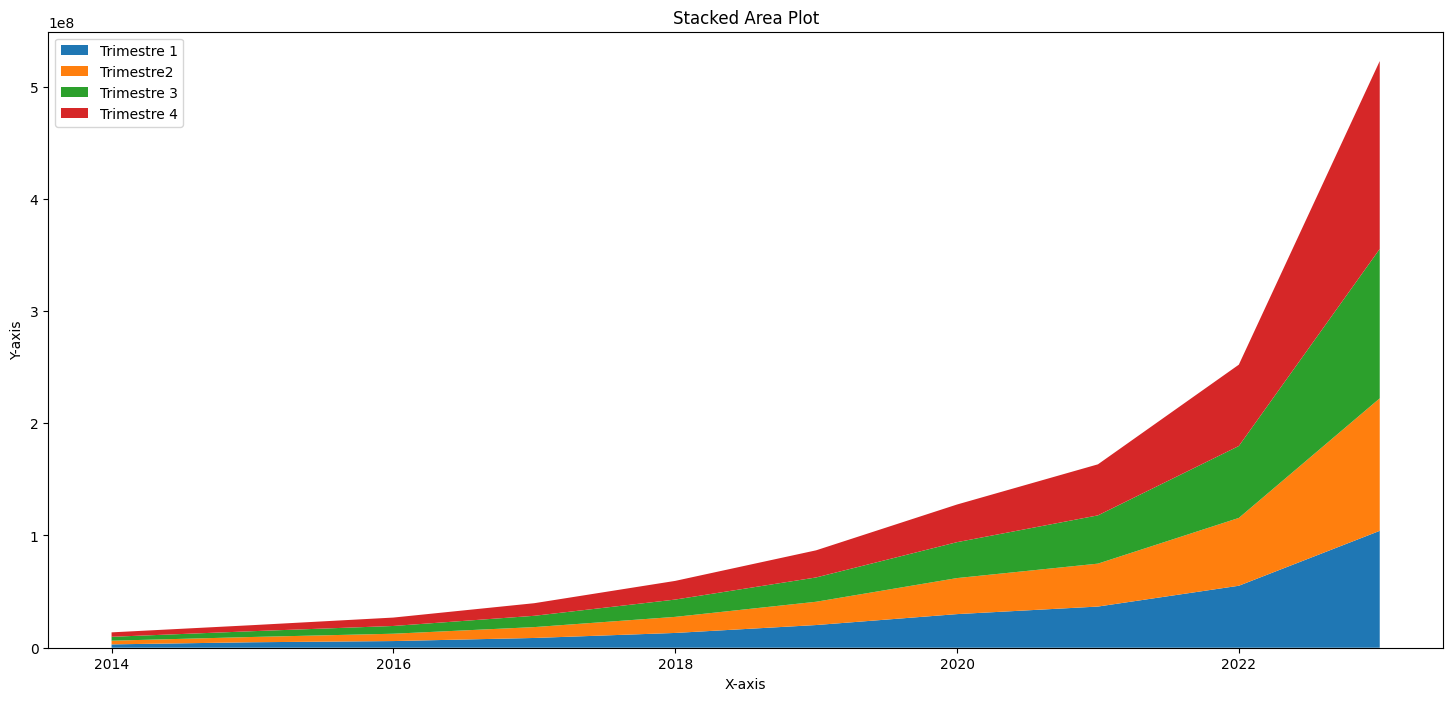

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Sample data
x = trim_1['Año']
y1 = trim_1['Ingresos (miles de pesos)']
y2 = trim_2['Ingresos (miles de pesos)']
y3 = trim_3['Ingresos (miles de pesos)']
y4 = trim_4['Ingresos (miles de pesos)']
#y3 = np.array([5, 6, 7, 8, 9])

# Create the stacked area plot
plt.figure(figsize=(18,8))
plt.stackplot(x, y1,y2,y3,y4, labels=['Trimestre 1','Trimestre2','Trimestre 3','Trimestre 4'])

# Set the title and labels
plt.title('Stacked Area Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the legend
plt.legend()

# Show the plot
plt.show()

Si bien las ganancias parecen excelentes, hay que recordar que durante los años registrados Argentina ha tenido una inflacion constante año tras año  
*...Bueno, por lo menos las ganancias trimestrales se ve que siguen un aumento parejo y casi siempre llevan la misma distancia entre las sombras*

In [ ]:
ingresos.to_excel("../data/processed/ingresos.xlsx")

In [ ]:
penetracion_totales = pd.read_parquet("../data/interim/penetracion_totales.parquet")
penetracion_totales

,Unnamed: 0,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,0,2024,1,78.890000,24.790000,Ene-Mar 2024
1,1,2023,4,78.560000,24.660000,Oct-Dic 2023
2,2,2023,3,77.840000,24.410000,Jul-Sept 2023
3,3,2023,2,77.020000,24.140000,Abr-Jun 2023
4,4,2023,1,77.200000,24.170000,Ene-Mar 2023
5,5,2022,4,77.210000,24.150000,Oct-Dic 2022
6,6,2022,3,76.640000,23.950000,Jul-Sept 2022
7,7,2022,2,75.965424,23.720442,Abr-Jun 2022
8,8,2022,1,73.878803,23.049171,Ene-Mar 2022
9,9,2021,4,73.176397,22.810702,Oct-Dic 2021


In [ ]:
penetracion_totales = penetracion_totales.drop('Unnamed: 0', axis=1)

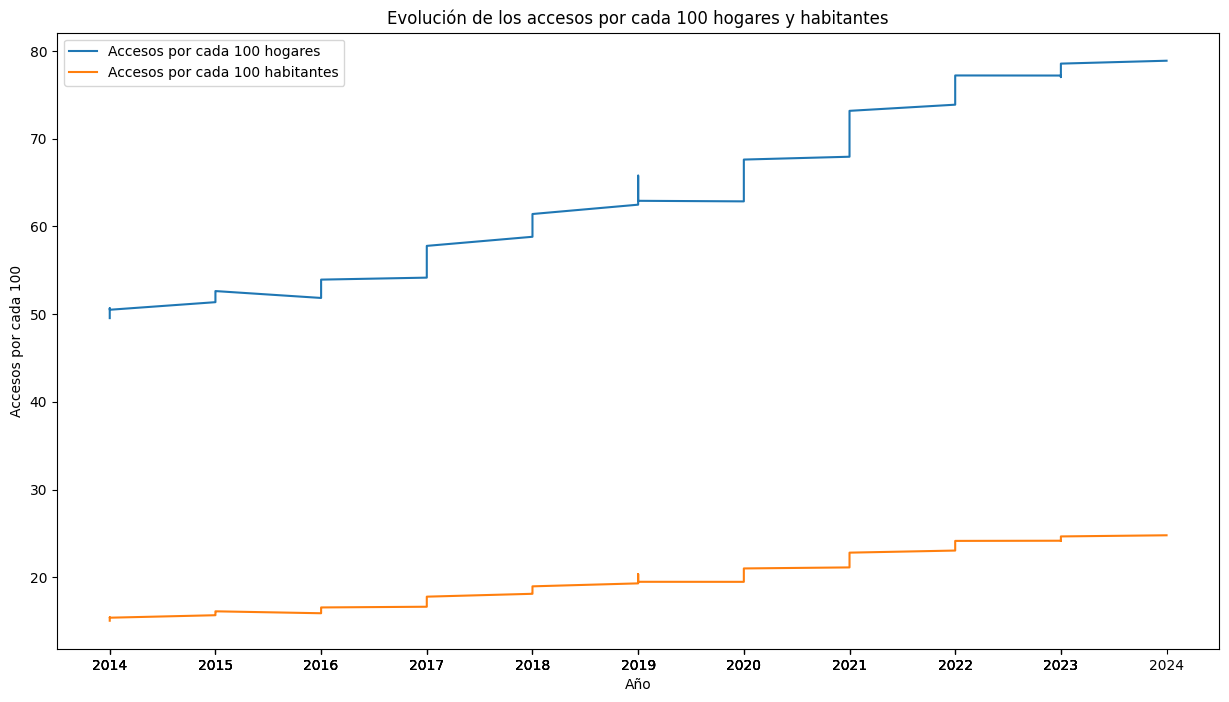

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(penetracion_totales['Año'], penetracion_totales['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares')
plt.plot(penetracion_totales['Año'], penetracion_totales['Accesos por cada 100 hab'], label='Accesos por cada 100 habitantes')

plt.title('Evolución de los accesos por cada 100 hogares y habitantes')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100')
plt.xticks(penetracion_totales['Año'])

plt.legend()
plt.show()

Entre 2019 2020 se puede ver un dato particularmente elevado y cae para luego volver a escalar ... esto puede ser debido a que daba inicio la Pandemia, reduciendo asi las salidas para realizar conexiones a los hogares

In [ ]:
penetracion_totales.to_excel("../data/processed/penetracion_totales.xlsx")

Por ultimo corroborar las diferencias de descargas, actuales y las de inicios del 2014

In [ ]:
VMD = pd.read_parquet("../data/interim/VMD.parquet")
VMD = VMD.drop('Unnamed: 0', axis=1)

In [ ]:
diferencia_velocidad_media = VMD.groupby(['Año','Trimestre']).sum().reset_index()
diferencia_velocidad_media = diferencia_velocidad_media.drop(['Provincia'], axis=1)

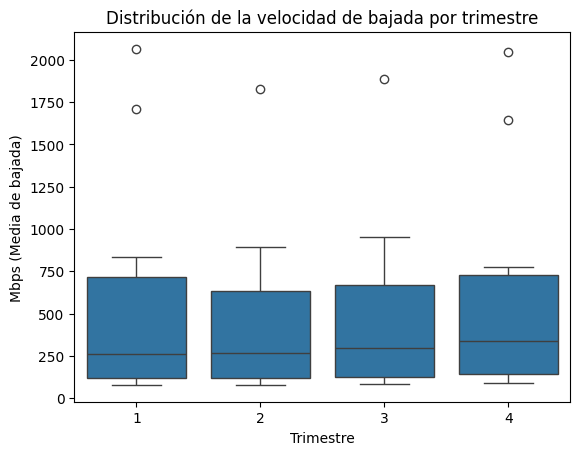

In [ ]:
sns.boxplot(x='Trimestre', y='Mbps (Media de bajada)', data=diferencia_velocidad_media)

plt.title('Distribución de la velocidad de bajada por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.show()

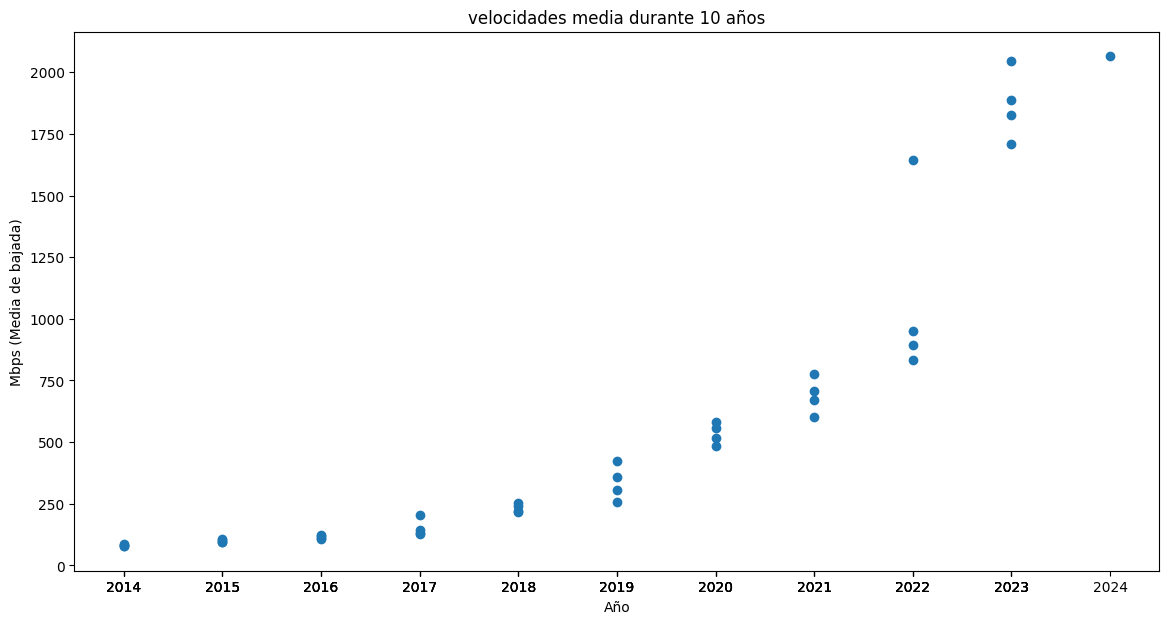

In [ ]:

plt.figure(figsize=(14,7))
plt.scatter(diferencia_velocidad_media['Año'], diferencia_velocidad_media['Mbps (Media de bajada)'])

plt.title('velocidades media durante 10 años')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(diferencia_velocidad_media['Año'])
plt.show()

Esta buenisimo ver esto, cada ultimo trimestre comienza a haber mas VMD, dando a entender que cada año va mejorando el servicio

In [ ]:
VMD.to_excel("../data/processed/vmd.xlsx")

###

###

Ahora vamos a verificar los datos de penetracion por hogares

In [30]:
p_hogares = pd.read_parquet("../data/interim/penetracion_hogares.parquet")
p_hogares.drop(["Unnamed: 0"],axis=1,inplace=True)

In [31]:
p_provincias = p_hogares.groupby(['Provincia']).mean().reset_index()
p_provincias.drop(["Trimestre","Año"],axis=1,inplace=True)
p_provincias

,Provincia,Accesos por cada 100 hogares
0,Buenos Aires,65.966736
1,Capital Federal,114.195494
2,Catamarca,40.540078
3,Chaco,34.754929
4,Chubut,56.941384
5,Corrientes,37.639101
6,Córdoba,69.802556
7,Entre Ríos,53.151239
8,Formosa,28.090813
9,Jujuy,38.588762


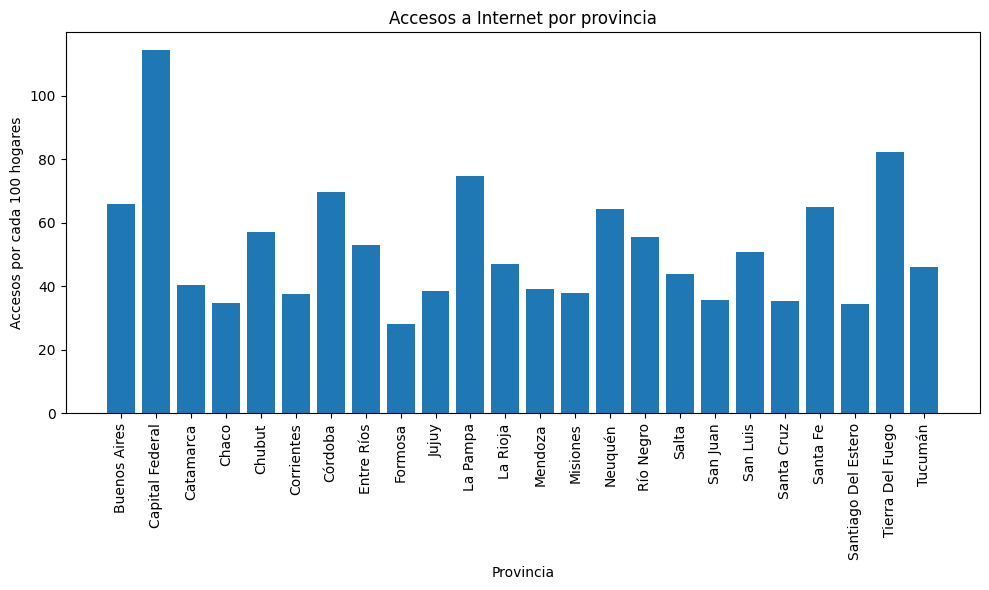

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(p_provincias['Provincia'], p_provincias['Accesos por cada 100 hogares'])
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos a Internet por provincia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
p_hogares.to_excel("../data/processed/penetracion_hogares.xlsx")